In [104]:
import numpy as np
import pandas as pd
train = pd.read_csv('/Users/matthewvitha/Downloads/mnist_train.csv')
new_column_name = ['label']
for num in range(train.shape[1]-1):
    tem = 'pixel' + str(num)
    new_column_name.append(tem)

train.columns = new_column_name

In [105]:
print(train.shape)
train.head()

(59999, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
test = pd.read_csv('/Users/matthewvitha/Downloads/mnist_test.csv')
new_column_name = ['label']
for num in range(test.shape[1]-1):
    tem = 'pixel' + str(num)
    new_column_name.append(tem)

test.columns = new_column_name

In [107]:
print(test.shape)
train.head()

(9999, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
train_result = train["label"]  # dependent variable
train_predictors = train.drop(["label"], axis = 1)
test_result = test["label"]  # dependent variable
test_predictors = test.drop(["label"], axis = 1)

In [109]:
from sklearn.preprocessing import StandardScaler
train_predictors = StandardScaler().fit_transform(train_predictors)
test_predictors = StandardScaler().fit_transform(test_predictors)

# Fit PCA to training data, find right number of components that capture ~95% of variability, and then transform train and test dataset using the PCA

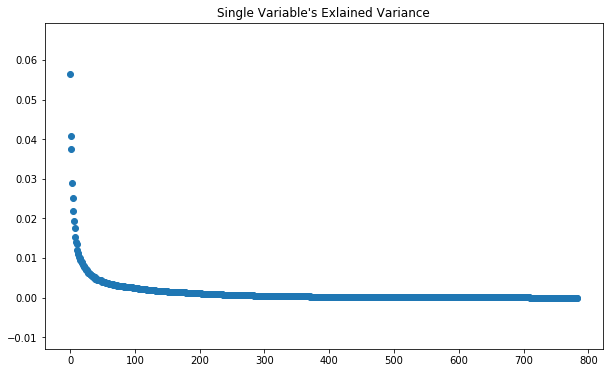

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

# Determine explained variance of each variables
from sklearn.decomposition import PCA

pca = PCA(n_components=784).fit(train_predictors)

plt.figure(figsize=(10,6))
plt.scatter(list(range(784)), pca.explained_variance_ratio_)
plt.title("Single Variable's Exlained Variance")
plt.show()

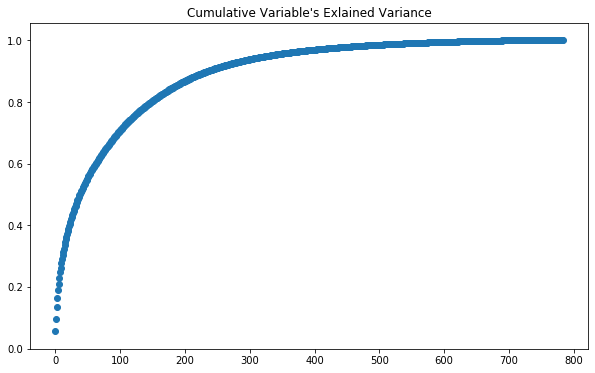

In [111]:
# Determine explained variance of cumulative variables
from sklearn.decomposition import PCA

pca = PCA(n_components=784).fit(train_predictors)

plt.figure(figsize=(10,6))
plt.scatter(list(range(784)), pca.explained_variance_ratio_.cumsum())
plt.title("Cumulative Variable's Exlained Variance")
plt.show()

In [121]:
# Get top 350 PCA components
from sklearn.decomposition import PCA
n_components = 350
pca = PCA(n_components=350).fit(train_predictors)
pca.explained_variance_ratio_

array([0.05646761, 0.04078298, 0.03739414, 0.02885052, 0.02521136,
       0.02194323, 0.0192337 , 0.01745816, 0.01535114, 0.01401742,
       0.01341763, 0.01203764, 0.01114599, 0.01089834, 0.01028642,
       0.009945  , 0.00936284, 0.00920994, 0.00893478, 0.00869891,
       0.00827327, 0.00803427, 0.00764871, 0.0074178 , 0.00715293,
       0.00691892, 0.00684142, 0.00656657, 0.00631685, 0.00612926,
       0.00596263, 0.00587727, 0.00571594, 0.00562342, 0.00554692,
       0.00538405, 0.00531189, 0.0051961 , 0.00508215, 0.00480018,
       0.00476456, 0.00469136, 0.00454342, 0.00451349, 0.00446967,
       0.00443387, 0.0043822 , 0.00430391, 0.00426865, 0.0042365 ,
       0.00404688, 0.00399448, 0.00397459, 0.00393827, 0.00385815,
       0.00379041, 0.00375402, 0.00370779, 0.00364945, 0.00359292,
       0.00352384, 0.00347796, 0.00344412, 0.00339873, 0.00335956,
       0.00334887, 0.00331858, 0.00323031, 0.00316276, 0.00313248,
       0.0031074 , 0.00307244, 0.00304897, 0.0030272 , 0.00299

In [122]:

# Transform to images
eigen_350 = pca.components_.reshape(n_components,28, 28)

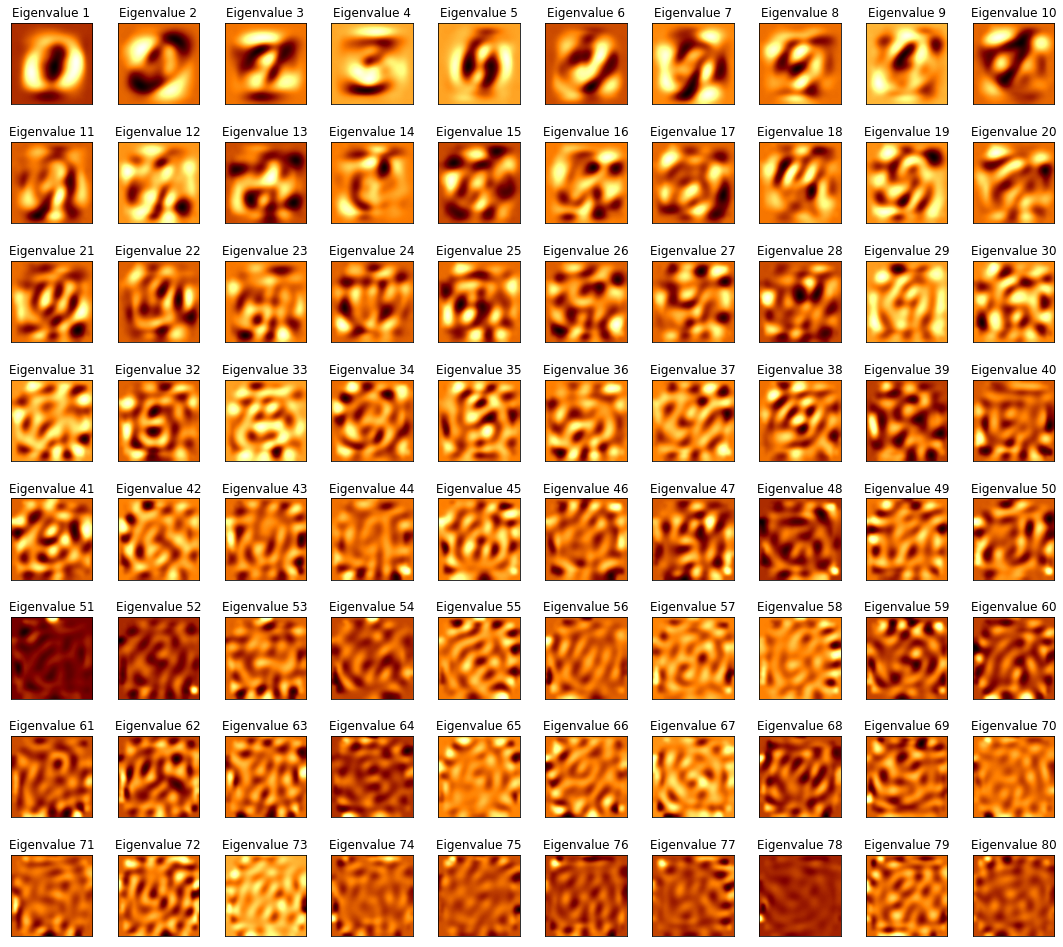

In [123]:
# Plot the first 80 eignenvalues
plt.figure(figsize=(15,15))
for i in list(range(80)):
    plt.subplot(9, 10, i + 1)
    plt.imshow(eigen_350[i], interpolation = "bicubic", cmap = "afmhot")
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=12)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()

In [124]:
eigen_350.shape

(350, 28, 28)

In [125]:
pca.components_.shape

(350, 784)

In [126]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-1.782919e-17,1.865891e-18,-4.254659e-18,-1.550988e-19,1.251844e-18,3.091388e-20,5.703940e-20,7.688076e-20,5.879424e-20,1.170211e-20,...,-0.000045,0.000891,0.001068,0.001062,0.001080,0.000853,0.0,0.0,0.0,0.0
1,7.880009e-17,-1.989648e-19,7.191973e-18,1.759071e-18,-1.207021e-17,-5.588587e-21,-3.001619e-19,-5.560715e-19,-2.895387e-19,1.123797e-19,...,0.016066,0.012120,0.008742,0.005689,0.003874,0.002447,0.0,0.0,0.0,0.0
2,3.776481e-18,8.429901e-19,2.713551e-17,-5.858042e-18,-3.042882e-18,-7.527740e-19,-8.852027e-19,-1.585282e-18,-7.293253e-19,4.214357e-20,...,-0.010398,-0.007186,-0.004724,-0.002422,-0.001537,-0.000897,0.0,0.0,0.0,0.0
3,-1.128776e-16,3.509819e-17,-1.625710e-17,-2.011803e-17,2.840268e-17,-7.145851e-19,-1.108169e-18,-1.330019e-18,2.254775e-19,-4.609288e-19,...,0.000128,0.000427,0.001354,0.001786,0.002013,0.001410,-0.0,-0.0,-0.0,-0.0
4,-6.645207e-17,-5.970214e-17,-3.735384e-17,1.427764e-17,6.914824e-17,2.221469e-18,1.669622e-18,1.281064e-17,9.508710e-18,-4.351163e-18,...,0.004709,0.003555,0.004067,0.004429,0.005053,0.003955,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,5.256285e-17,-1.908068e-17,-6.318008e-17,4.007188e-18,1.933077e-17,-1.629507e-17,9.130870e-17,-2.267346e-17,7.235138e-18,-2.422640e-17,...,0.019646,-0.011674,-0.009919,0.017549,-0.015641,-0.008989,0.0,0.0,0.0,0.0
346,5.033216e-18,4.637639e-17,5.848455e-17,4.484434e-18,2.127806e-17,-3.061956e-18,-1.136217e-17,1.986146e-17,2.998663e-17,-2.941213e-17,...,0.004441,-0.009811,0.013065,-0.011785,0.000661,0.003121,0.0,0.0,0.0,0.0
347,-4.472951e-17,3.384207e-17,3.966712e-17,3.287761e-17,-1.321074e-17,2.558227e-17,-1.322402e-17,9.333319e-18,3.042149e-17,-5.951454e-18,...,-0.010866,-0.009463,0.015962,-0.012236,-0.002406,0.007775,0.0,0.0,0.0,0.0
348,6.637778e-17,3.058299e-17,1.993219e-19,-1.658716e-17,3.287261e-18,-9.541128e-18,-1.325889e-17,2.239816e-18,-3.931848e-17,4.848324e-17,...,0.027704,0.013973,-0.031849,0.028427,-0.001088,-0.024445,0.0,0.0,0.0,0.0


# Transform training data using PCA

In [127]:
train_img = pca.transform(train_predictors)

In [128]:
train_img

array([[ 8.70903437e+00, -7.75426009e+00, -3.44763482e+00, ...,
        -1.92363776e-01,  1.43694505e-01,  1.98472873e-01],
       [ 2.32823872e+00,  9.43074644e+00, -6.18430573e+00, ...,
        -1.63880751e-01,  7.40990568e-02, -8.32042174e-01],
       [-6.58214283e+00, -3.74657039e+00,  3.69095794e+00, ...,
        -1.49337530e-01,  1.37078320e-01,  1.39300117e-01],
       ...,
       [-3.77685315e+00, -3.23051494e+00, -3.80634410e+00, ...,
         4.50418546e-01,  4.76720222e-01,  5.85323269e-01],
       [ 1.72229905e+00, -4.94829634e+00,  7.14453124e-03, ...,
        -6.49774839e-01, -2.16362086e-01,  7.59297007e-01],
       [-1.42720983e+00, -6.17571668e+00, -2.96754049e+00, ...,
         7.37460783e-01,  3.69498931e-02, -4.51107775e-01]])

In [129]:
train_img.shape

(59999, 350)

In [130]:
test_img = pca.transform(test_predictors)

# Conduct Logistic Regression on PCA transformed Data

In [131]:
from sklearn.preprocessing import StandardScaler
train_predictors = StandardScaler().fit_transform(train_img)
test_predictors = StandardScaler().fit_transform(test_img)

In [133]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_predictors, train_result)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
predictions = logisticRegr.predict(test_predictors)


In [135]:
score = logisticRegr.score(test_predictors, test_result)
print(score)

0.9217921792179218


# The PCA for logistic regression performed better than non-pca-logistic regression! 

# .921 vs .917 (found in other notebook)

# SVM on PCA Data

In [136]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [137]:
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
parameters = {'SVM__C':[0.001], 'SVM__gamma':[10]}
pipeline = Pipeline(steps)

In [138]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=3)
grid.fit(train_predictors[0:5000], train_result[0:5000])

print("score = %3.2f" %(grid.score(test_predictors[0:5000], test_result[0:5000])))


print("best parameters from train data: ", grid.best_params_)

score = 0.74
best parameters from train data:  {'SVM__C': 0.001, 'SVM__gamma': 10}


# PCA SVM performed significantly worse than previously using PCA

# PCA data score of .74 versus SVM non-pca score of .92

# Decision tree data

In [140]:
from sklearn import tree
from sklearn import metrics

In [143]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=32, max_features=349)
clf = clf.fit(train_predictors, train_result)

In [144]:
predictionRes = clf.predict(test_predictors)

In [145]:
print(metrics.classification_report(test_result.tolist(), predictionRes, digits=4))


              precision    recall  f1-score   support

           0     0.8736    0.8888    0.8811       980
           1     0.9361    0.9427    0.9394      1135
           2     0.7722    0.7684    0.7703      1032
           3     0.7555    0.7861    0.7705      1010
           4     0.7965    0.7770    0.7866       982
           5     0.7346    0.7635    0.7488       892
           6     0.8762    0.8643    0.8702       958
           7     0.8183    0.8111    0.8147      1027
           8     0.7200    0.6786    0.6987       974
           9     0.7429    0.7473    0.7451      1009

    accuracy                         0.8049      9999
   macro avg     0.8026    0.8028    0.8025      9999
weighted avg     0.8047    0.8049    0.8047      9999



In [146]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, train_predictors, train_result.tolist(), cv=2)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

[0.79428038 0.80051338]
Accuracy: 0.80 (+/- 0.00)


In [147]:
scores = cross_val_score(clf, test_predictors, test_result.tolist(), cv=2)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

[0.62707459 0.68527411]
Accuracy: 0.66 (+/- 0.01)


# Decision Trees on PCA data performed slightly worse than non-pca data
# pca test was .72, compared to non-pca test which was .66

# Random forest 

In [150]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

rfc_params = RandomForestClassifier(n_estimators=800, max_depth=100, max_features='sqrt',min_samples_split=5,min_samples_leaf=1,bootstrap=False)
rfc_params.fit(train_predictors,train_result)
rfc_params_predict = rfc_params.predict(test_predictors)

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_result, rfc_params_predict))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.98      0.99      1135
           2       0.94      0.94      0.94      1032
           3       0.90      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.94      0.92      0.93       892
           6       0.96      0.97      0.96       958
           7       0.93      0.93      0.93      1027
           8       0.94      0.92      0.93       974
           9       0.94      0.91      0.92      1009

    accuracy                           0.95      9999
   macro avg       0.95      0.95      0.95      9999
weighted avg       0.95      0.95      0.95      9999



# Random Forest with PCA perfomed slightly worse than without (.95 vs .96)

# Below Is some attempts at visualization 

In [20]:
np.random.seed(42)
rndperm = np.random.permutation(train_predictors.shape[0])

In [30]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_predictors)


In [37]:
train_predictors = pd.DataFrame(train_predictors)

In [38]:
#df.loc[len(df)] = your_array

train_predictors = train_predictors.append(dict(zip(train_predictors.columns, pca_result[:,1])), ignore_index=True)

In [43]:
train_predictors['pca-one'] = pd.DataFrame(pca_result[:,0])
train_predictors['pca-two'] = pd.DataFrame(pca_result[:,1] )
train_predictors['pca-three'] = pd.DataFrame(pca_result[:,2])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.05646761 0.04078298 0.03739414]


In [50]:
train_predictors['pca-two'].isnull().sum() 

1

In [99]:
pca_result.shape

(59999, 3)

In [54]:
from sklearn.manifold import TSNE
N = 10000
df_subset = train_predictors.loc[rndperm[:N],:].copy()

In [56]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.526s...
[t-SNE] Computed neighbors for 10000 samples in 109.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.604311
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.603302
[t-SNE] KL divergence after 300 iterations: 2.794336
t-SNE done! Time elapse

In [ ]:
reduced_df = np.vstack((reduced_data.T, label)).T


In [71]:
df_subset

,0,1,2,3,4,5,6,7,8,9,...,779,780,781,782,783,pca-one,pca-two,pca-three,tsne-2d-one,tsne-2d-two
12628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00577,0.0,0.0,0.0,0.0,-4.073198,-5.455345,-7.809924,-10.035580,-1.394775
51841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00577,0.0,0.0,0.0,0.0,5.525620,8.242235,-4.393169,2.526702,-8.435286
47430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00577,0.0,0.0,0.0,0.0,2.057526,-4.614094,-6.491565,-4.766415,-1.063824
8525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00577,0.0,0.0,0.0,0.0,7.954694,1.909549,5.945518,5.748336,6.852363
8279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00577,0.0,0.0,0.0,0.0,-2.661628,9.853266,-5.872318,-4.087481,-8.512237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00577,0.0,0.0,0.0,0.0,-3.855650,15.214365,-13.677850,-3.830968,-9.797080
19486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00577,0.0,0.0,0.0,0.0,-0.109658,0.356728,-9.054787,-1.940607,-0.976524
3256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00577,0.0,0.0,0.0,0.0,-5.866844,-1.850171,-3.055694,-6.552699,-1.936566
14473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00577,0.0,0.0,0.0,0.0,0.174110,-0.789649,4.869592,0.391901,1.086381


In [81]:
train_result1 = train_result[0:10000]

In [69]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            patheffects.Stroke(linewidth=5, foreground="w"),
            patheffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [64]:
train_predictors['pca-one']
top_two_comp = train_predictors[['pca-one','pca-two']]
top_two_comp = train_predictors[['pca-one','pca-two']].head(-1)

(<Figure size 576x576 with 1 Axes>,
 [Text(11.36095820167266, -3.1871595242266406, '0'),
  Text(-7.462541193715533, -1.7049126927111573, '1'),
  Text(2.435772925632012, -0.5045846441078778, '2'),
  Text(-0.10168889053082193, 0.6313885925896359, '3'),
  Text(-1.712735274691241, 1.493726655747613, '4'),
  Text(-0.6853297935360034, -2.768903083455019, '5'),
  Text(0.8048092667115379, -2.068299193295775, '6'),
  Text(-4.284474429797755, 3.3363305357535595, '7'),
  Text(-1.7165797016474438, -1.8820900519447468, '8'),
  Text(-3.9706186297737647, 2.4508936589610393, '9')])

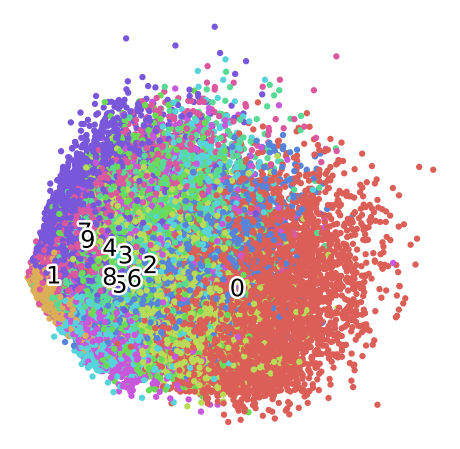

In [88]:
import matplotlib.patheffects as patheffects
fashion_scatter(top_two_comp.values,train_result)

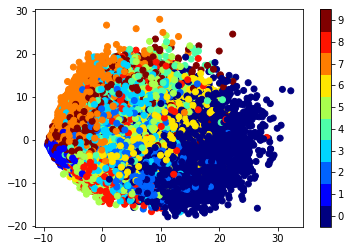

In [78]:
plt.scatter(train_predictors['pca-one'].head(-1), train_predictors['pca-two'].head(-1), c=train_result, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [77]:
train_predictors.head(-1).shape

(59999, 787)

In [76]:
train_result.shape

(59999,)

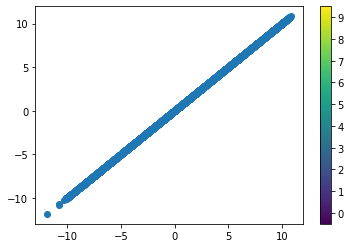

In [92]:
plt.scatter(df_subset['tsne-2d-one'], df_subset['tsne-2d-one'], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [86]:
df_subset['tsne-2d-one']

12628   -10.035580
51841     2.526702
47430    -4.766415
8525      5.748336
8279     -4.087481
           ...    
35175    -3.830968
19486    -1.940607
3256     -6.552699
14473     0.391901
46606    -5.215872
Name: tsne-2d-one, Length: 10000, dtype: float32

In [90]:
import matplotlib.patheffects as patheffects
top_two_comp_tsne = df_subset[['tsne-2d-one','tsne-2d-one']]

(<Figure size 576x576 with 1 Axes>,
 [Text(0.21983431, 0.21983431, '0'),
  Text(0.37311715, 0.37311715, '1'),
  Text(0.26070383, 0.26070383, '2'),
  Text(-0.26606473, -0.26606473, '3'),
  Text(0.6765218, 0.6765218, '4'),
  Text(0.27328923, 0.27328923, '5'),
  Text(-0.24577734, -0.24577734, '6'),
  Text(-0.409568, -0.409568, '7'),
  Text(-0.38051262, -0.38051262, '8'),
  Text(-0.037309293, -0.037309293, '9')])

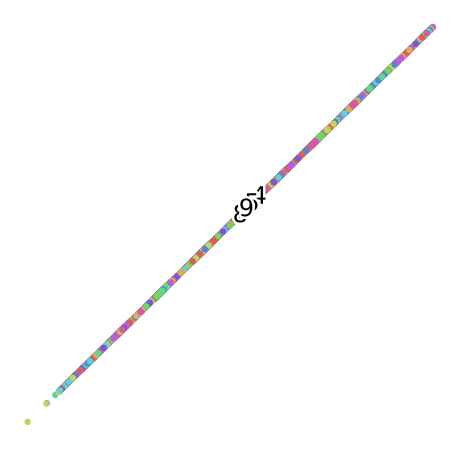

In [91]:
fashion_scatter(top_two_comp_tsne.values,train_result1)

In [95]:
len(tsne_results)

10000

In [96]:
len(tsne_results[0])

2

In [ ]:
plt.scatter(train_predictors['pca-one'].head(-1), train_predictors['pca-two'].head(-1), c=train_result, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()